# Assigment 3
### By Marissa Beaty

Notebook from Week 7.2

# Five Personality Traits Clustering with K-Means 
# Assigment 3

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)


This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. You can see more from https://www.kaggle.com/datasets/tunguz/big-five-personality-test 


The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can see the questions in the codebook.txt or at the https://ipip.ori.org/new_ipip-50-item-scale.htm website and from the Goldberg paper 

Resources:

[1].Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42.

[2]https://openpsychometrics.org/tests/IPIP-BFFM/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#loading the dataset

data = pd.read_csv('data/data-small.csv')
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()

Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


In [4]:
#understanding the data

print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  4504
Number of participants after eliminating missing values:  49906


In [5]:
#double checking the above function worked 
print('Is there any missing value? ', data.isnull().values.any())

Is there any missing value?  False


In [6]:
#defining a function to visualize the questions and answers distributions

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1,11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color=color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [7]:
#load in questions databank

import json
with open("data/questions.json", 'r') as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")


In [8]:
#helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5, figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

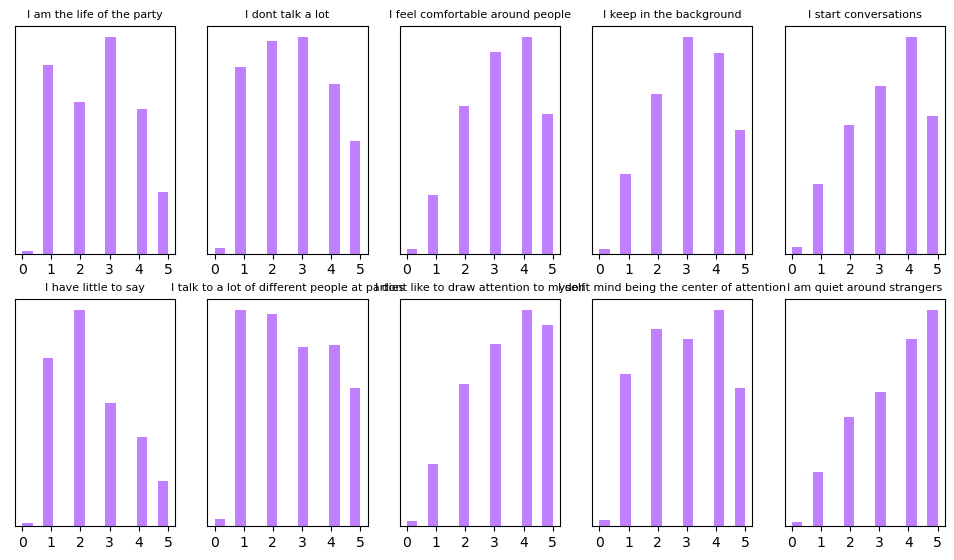

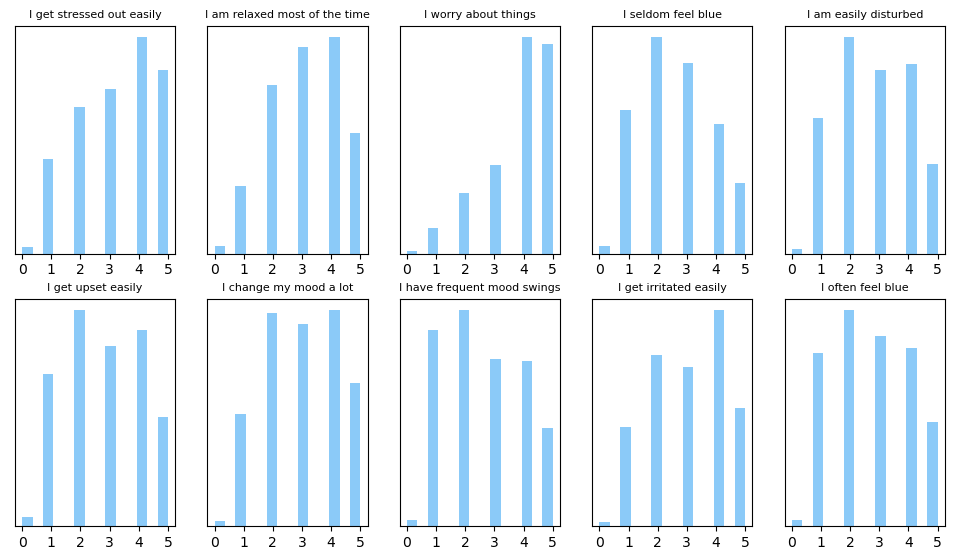

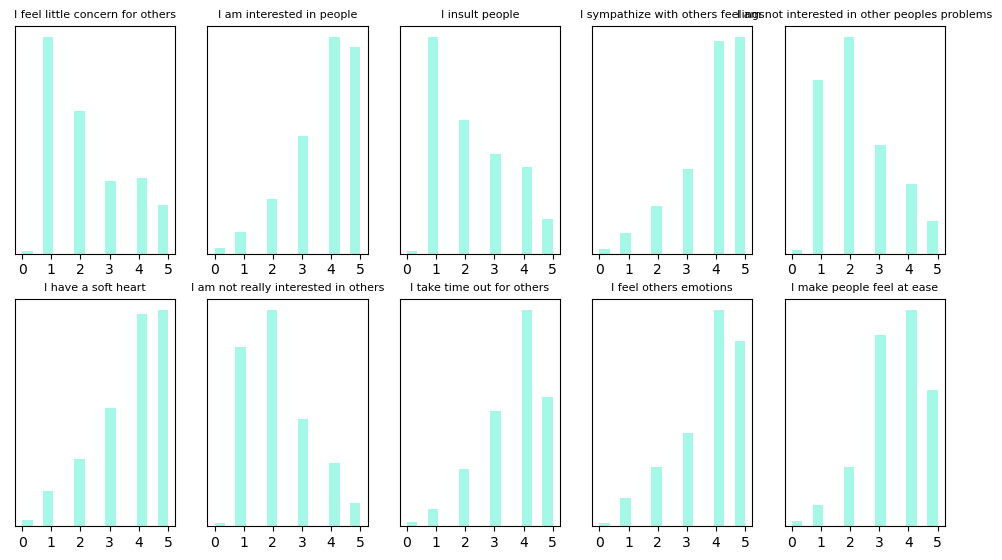

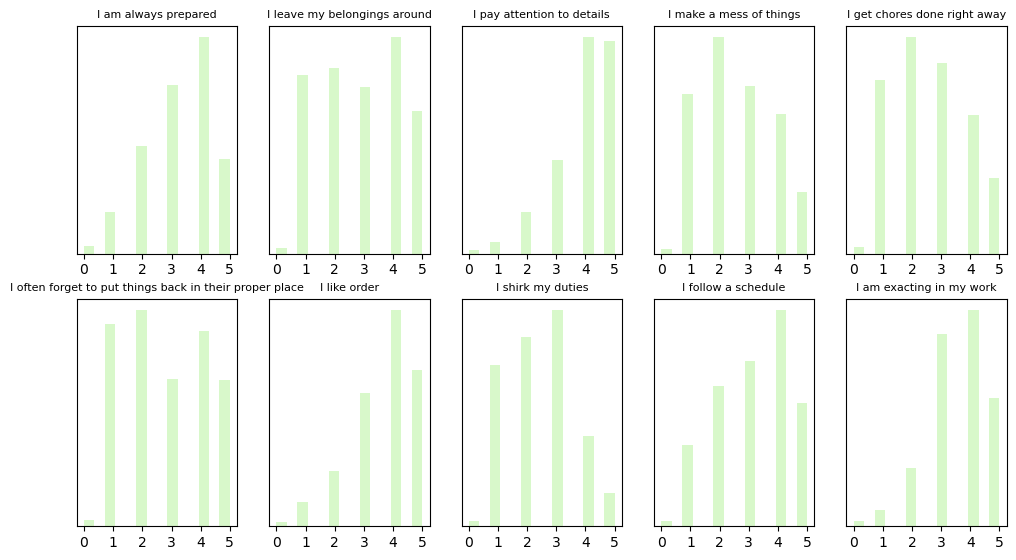

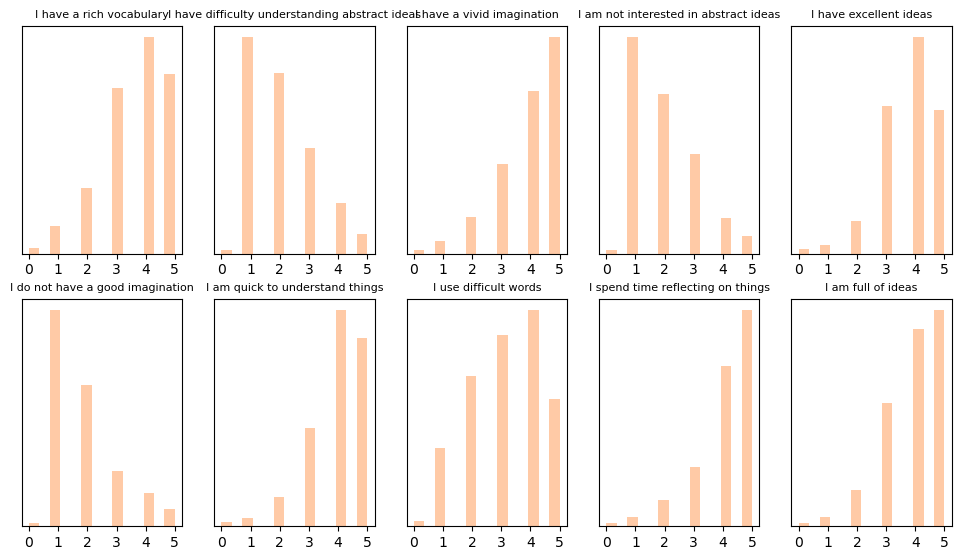

In [9]:
#plot all questions
for i, t in enumerate(traits):
    vis_questions(t, colours(i/5))

In [10]:
#for ease of calculation, let's scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [9]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [11]:
import warnings
warnings.filterwarnings("ignore")

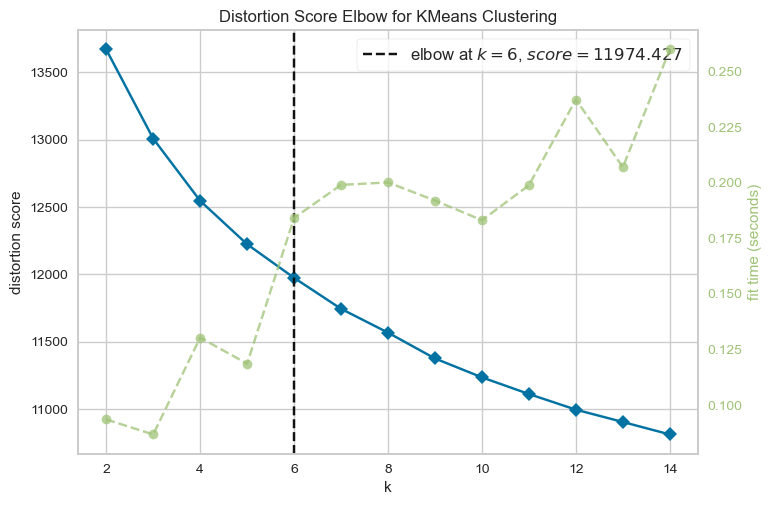

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see, 5 clusters look optimum for the data set and we already know this research is to identify 5 different personalities. 

## Clustering Participants into 5 Personality Groups


## K-Means

[K-means](http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [13]:
#creating k-means cluster model
from sklearn.cluster import KMeans

#use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

#define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [14]:
#predicting the clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_ 
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,4
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,0
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,4
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,3
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,3


## Analysing the Model and Predictions

How many individuals do we have for each cluster? 

In [15]:
df_model.Clusters.value_counts()

1    10365
2    10128
4    10001
0     9806
3     9606
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [16]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,717414.204467,2.637773,2.765960,3.249031,3.140118,3.264022,2.348256,2.738018,3.393127,2.966653,3.560473,3.290128,3.120131,3.841628,2.619621,2.822456,2.825515,3.050173,2.698144,3.103304,2.804303,2.221293,3.833469,2.288599,3.929635,2.279727,3.716296,2.197430,3.680808,3.774628,3.580971,3.311136,2.977361,3.979910,2.613196,2.592290,2.859678,3.681114,2.458087,3.179686,3.604732,3.719865,1.991026,4.026616,1.908831,3.830614,1.877320,4.006119,3.286967,4.194269,4.004895
1,104457.111819,2.624988,2.823734,3.270333,3.189966,3.239846,2.503232,2.766040,3.444187,2.977038,3.585432,3.216594,3.248046,3.828558,2.681235,2.806850,2.828075,3.055282,2.660685,3.101688,2.757356,2.299855,3.789001,2.353980,3.890014,2.307863,3.720116,2.238591,3.650072,3.741823,3.544042,3.264834,2.963821,3.933623,2.641100,2.562759,2.846310,3.675639,2.505644,3.147612,3.547902,3.639846,2.109600,3.987651,2.069561,3.754462,1.922238,3.970092,3.156874,4.078437,3.910950
2,311836.240719,2.672591,2.759479,3.297097,3.144352,3.291568,2.430095,2.799269,3.423381,2.957050,3.538408,3.323558,3.148203,3.886947,2.713369,2.894451,2.901264,3.090936,2.734005,3.107919,2.772709,2.326817,3.821584,2.259676,3.935821,2.272611,3.772117,2.192634,3.693523,3.814080,3.611868,3.280115,2.925948,3.995656,2.668246,2.691746,2.859301,3.685723,2.491311,3.193918,3.588566,3.611276,2.175553,3.988349,2.098934,3.759182,1.911236,3.939870,3.106438,4.074743,3.933353
3,914715.470747,2.663544,2.745888,3.324797,3.133042,3.315011,2.332396,2.789090,3.393296,2.973454,3.541849,3.296377,3.139080,3.864876,2.631793,2.830210,2.830731,3.034249,2.667812,3.052571,2.780762,2.193317,3.877160,2.176869,3.973246,2.239538,3.775245,2.164897,3.730377,3.824797,3.621382,3.358734,2.910369,3.993546,2.547158,2.687071,2.776286,3.750260,2.392775,3.271289,3.643764,3.702374,2.029148,4.007495,1.926817,3.836873,1.870185,4.012909,3.225276,4.179575,3.992817
4,516189.047495,2.644736,2.757524,3.282272,3.125987,3.285871,2.402560,2.787321,3.419258,2.978702,3.532347,3.287171,3.167383,3.834217,2.677132,2.842816,2.833617,3.042696,2.672833,3.090891,2.779222,2.277972,3.830317,2.252575,3.910309,2.252275,3.741526,2.201580,3.683932,3.781522,3.600340,3.289071,2.898810,3.994501,2.598440,2.644736,2.821918,3.719128,2.470353,3.211279,3.590041,3.645235,2.064894,4.004200,1.991301,3.817218,1.894911,3.967203,3.190281,4.126487,3.985901


Let's sum up each question group and see if there is a pattern.

In [17]:
#summing up the different question groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,71744.070742,3.093157,3.072619,3.123343,3.244636
1,10448.395118,3.101245,3.074867,3.108538,3.223666
2,31186.301560,3.133906,3.086157,3.140383,3.225415
3,91474.214127,3.088955,3.073621,3.130887,3.243442
4,51621.573173,3.098110,3.071123,3.124858,3.229177


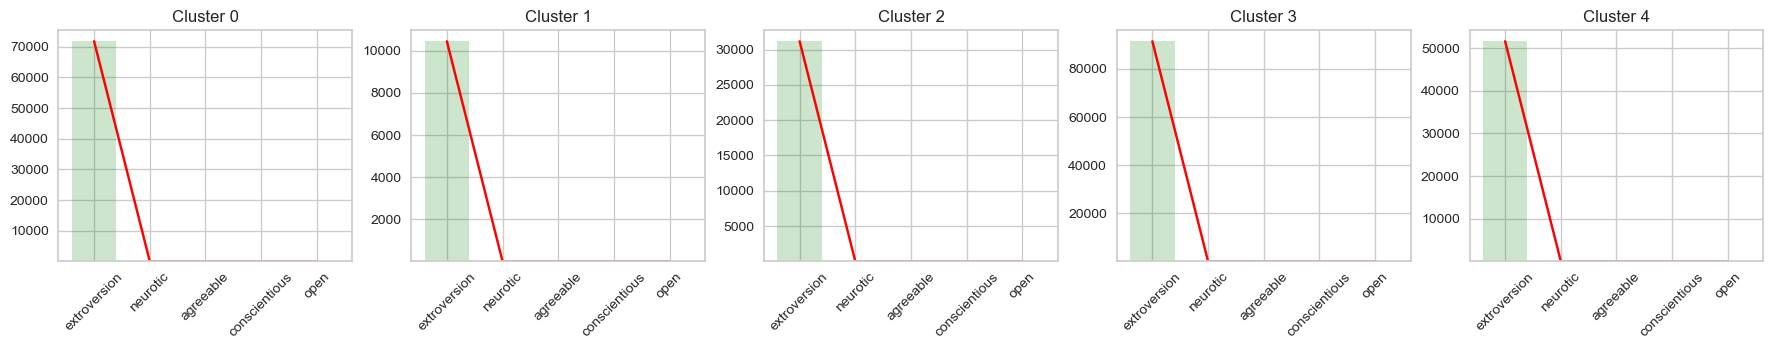

In [18]:
#visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:],color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0.4)

# Visualizing the Cluter Predictions

# PCA

[Principal Component Analysis (PCA)](https://rpubs.com/cyobero/pca-clustering#:~:text=Principal%20Component%20Analysis%20(PCA)%20is%20an%20unsupervised%20machine%20learning%20technique,Visualizing%20High%2DDimensional) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [19]:
#in order to visualize in 2D, PCA will be used
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,44046.698175,0.302550,4
1,305914.698170,2.165817,0
2,-55301.301826,-3.938567,4
3,413620.698172,3.319708,3
4,388961.698174,-0.852158,3


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

# Assignment 3

# Tasks

In the questions, there is a clear self judgement bias where positive attributes (“I have a rich vocabulary) are rated higher than negative ones (“I do not have a good imagination”). This is demonstrated by steep negative or positive skews in the data 

A variety of these within a trait balances itself out as we can see by the 5 personality types all having reasonably similar means (~3)

## Task 1

Add 5 extra columns, each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.

Use this to show the mean of each trait over the whole dataset

**TIPS**
You can use ``keys_for_trait()`` to slice out all the questions for a particular trait

In [20]:
#setting up variables to pull out those questions in the dataset
EXT = keys_for_trait('EXT')
EST = keys_for_trait('EST')
AGR = keys_for_trait('AGR')
CSN = keys_for_trait('CSN')
OPN = keys_for_trait('OPN') 

In [21]:
#add 5 columns to our dataframe with our averages for each personality type

#creating an empty list to hold the averages
user_ext = []
user_est = []
user_agr = []
user_csn = []
user_opn = []

#iterating through the dataframe and pulling out the averages for each question group
for index, user in data.iterrows():
    user_ext.append(user[EXT].mean())
    user_est.append(user[EST].mean())
    user_agr.append(user[AGR].mean())
    user_csn.append(user[CSN].mean())
    user_opn.append(user[OPN].mean())

#appending those averages for each user into a new column in the dataframe
data['EXT_average'] = user_ext
data['EST_average'] = user_est
data['AGR_average'] = user_agr
data['CSN_average'] = user_csn
data['OPN_average'] = user_opn


In [22]:
#taking a look at the dataset to confirm our changes were made
data.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,EXT_average,EST_average,AGR_average,CSN_average,OPN_average
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR,2.6,3.7,3.0,2.0,2.6
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US,2.9,3.4,3.3,3.2,3.5
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US,3.4,2.5,3.6,2.6,3.6
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US,2.7,2.4,2.6,2.8,3.4
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY,2.7,3.1,2.7,2.8,2.7


In [23]:
#getting the average value for each of our personality traits
ext_total_average = data['EXT_average'].mean()
est_total_average = data['EST_average'].mean()
agr_total_average = data['AGR_average'].mean()
csn_total_average = data['CSN_average'].mean()
opn_total_average = data['OPN_average'].mean()

print("The average score for extroversion is: ", ext_total_average)
print("The average score for neurotic is: ", est_total_average)
print("The average score for agreeable is: ", agr_total_average)
print("The average score for conscientious is: ", csn_total_average)
print("The average score for open is: ", opn_total_average)


The average score for extroversion is:  3.0248547268865464
The average score for neurotic is:  3.025952791247545
The average score for agreeable is:  3.156991143349497
The average score for conscientious is:  3.1257804672784837
The average score for open is:  3.2701037951348533


## Task 2

Write some code to rank the five traits on how much positive and negative skew there is in response to each question. 

E.g A trait where all of the questions had an equal spread of answers across 0-5 would rank lowly, and one where all the questions either skewed positively (from low to high) or negatively (from high to low) would rank highly 

**TIPS**
The function ``scipy.stat.skew()`` can give you the skew of data for a specific column (e.g. one question)

Again, you can use ``keys_for_trait()`` to slice out all the questions for a particular trait

Remember, highly skewed traits will contain questions skewed both positively and negatively

In [24]:
#import skew

from scipy.stats import skew

What we need to do is find the skew for each question (column in the dataframe)

I already defined my question groups, I just need to get the skew for each question and save it back into that group. 

In [89]:
#creating a dataframe to save our average skews for each trait, so they can be ranked
ranked_traits = pd.DataFrame({"Traits": pd.Series(dtype='str'),
                              "Average Skew": pd.Series(dtype='int')})

In [25]:
#iterating through them all
for columns in data:
    if columns in EXT:
        print(columns, skew(data[columns]))
    if columns in EST:
        print(columns, skew(data[columns]))
    if columns in AGR:
        print(columns, skew(data[columns]))
    if columns in CSN:
        print(columns, skew(data[columns]))
    if columns in OPN:
        print(columns, skew(data[columns]))

EXT1 0.14922895404036676
EXT2 0.15259657587671677
EXT3 -0.2792955091382903
EXT4 -0.17944379495610588
EXT5 -0.3732787551073541
EXT6 0.5489333151896756
EXT7 0.15056549502376185
EXT8 -0.3893711204227024
EXT9 -0.04883700220534794
EXT10 -0.5399730070658465
EST1 -0.327408622349892
EST2 -0.22179281101984893
EST3 -0.953549292560431
EST4 0.2378309079734583
EST5 0.07559877865341474
EST6 0.048220478839306025
EST7 -0.07243291504176515
EST8 0.22429204776082115
EST9 -0.16621069631669297
EST10 0.13724153055905913
AGR1 0.7073888928479241
AGR2 -0.9354186617049717
AGR3 0.593800012338043
AGR4 -1.0989636022906157
AGR5 0.6828598326685161
AGR6 -0.8629854157353127
AGR7 0.7124241149593249
AGR8 -0.7937644050038022
AGR9 -0.9035002353717004
AGR10 -0.6208035569070954
CSN1 -0.4707216018701447
CSN2 -0.029596083061092016
CSN3 -1.0632000767118233
CSN4 0.27396715466143895
CSN5 0.26091654005697895
CSN6 0.1117859607434505
CSN7 -0.7816177683733613
CSN8 0.28015458289514206
CSN9 -0.287633995735212
CSN10 -0.5955884067027184

In [26]:
#separate the questions into each trait group

ext_data_for_skew = data.loc[:, EXT]
est_data_for_skew = data.loc[:, EST]
agr_data_for_skew = data.loc[:, AGR]
csn_data_for_skew = data.loc[:, CSN]
opn_data_for_skew = data.loc[:, OPN]

In [65]:
#let's look at ext - extroversion
ext_skewed_data = []
for columns in ext_data_for_skew:
    #take a look at the data and the skewed values
    print(columns, skew(ext_data_for_skew[columns]))
    #getting the absolute values of the skew so we can find the average
    ext_skewed_data.append(abs(skew(ext_data_for_skew[columns])))

#getting the average skew
EXT_avg_skew = sum(ext_skewed_data) / len(ext_skewed_data)
#taking a look at the average skew for this trait
print('The average skew for extroversion is: ', EXT_avg_skew)


EXT1 0.14922895404036676
EXT2 0.15259657587671677
EXT3 -0.2792955091382903
EXT4 -0.17944379495610588
EXT5 -0.3732787551073541
EXT6 0.5489333151896756
EXT7 0.15056549502376185
EXT8 -0.3893711204227024
EXT9 -0.04883700220534794
EXT10 -0.5399730070658465
The average skew for extroversion is:  0.28115235290261686


In [96]:
#append the extroversion average skew to our dataframe
ranked_traits = ranked_traits.append({'Traits': 'EXT', 'Average Skew': EXT_avg_skew}, ignore_index=True)

In [66]:
#est - neurotic
est_skewed_data = []
for columns in est_data_for_skew:
    #take a look at the data and skewed values for each question
    print(columns, skew(est_data_for_skew[columns]))
    #getting the absolute values of the skew so we can find the average
    est_skewed_data.append(abs(skew(est_data_for_skew[columns])))

#getting the average skew
EST_avg_skew = sum(est_skewed_data) / len(est_skewed_data)
#taking a look at the average skew for this trait
print('The average skew for neurotic is: ', EST_avg_skew)

EST1 -0.327408622349892
EST2 -0.22179281101984893
EST3 -0.953549292560431
EST4 0.2378309079734583
EST5 0.07559877865341474
EST6 0.048220478839306025
EST7 -0.07243291504176515
EST8 0.22429204776082115
EST9 -0.16621069631669297
EST10 0.13724153055905913
The average skew for neurotic is:  0.24645780810746895


In [95]:
#append EST average skew to our dataframe
ranked_traits = ranked_traits.append({'Traits': 'EST', 'Average Skew': EST_avg_skew}, ignore_index=True)

In [67]:
#agr - agreeable
agr_skewed_data = []
for columns in agr_data_for_skew:
    #taking a look at the data dn the skewed values
    print(columns, skew(agr_data_for_skew[columns]))
    #getting the absolute values of the skew so we can compute the average for ranking
    agr_skewed_data.append(abs(skew(agr_data_for_skew[columns])))

#getting the average skew
AGR_avg_skew = sum(agr_skewed_data) / len(agr_skewed_data)
#taking a look at the average skew for this trait
print('The average skew for agreeable is: ', AGR_avg_skew)

AGR1 0.7073888928479241
AGR2 -0.9354186617049717
AGR3 0.593800012338043
AGR4 -1.0989636022906157
AGR5 0.6828598326685161
AGR6 -0.8629854157353127
AGR7 0.7124241149593249
AGR8 -0.7937644050038022
AGR9 -0.9035002353717004
AGR10 -0.6208035569070954
The average skew for agreeable is:  0.7911908729827306


In [94]:
#append AGR skew to our dataframe
ranked_traits = ranked_traits.append({'Traits': 'AGR', 'Average Skew': AGR_avg_skew}, ignore_index=True)

In [69]:
#csn - conscientious
csn_skewed_data = []
for columns in csn_data_for_skew:
    #taking a look at the data and skewed values for each question
    print(columns, skew(csn_data_for_skew[columns]))
    #getting the absolute values of the skew so we can find the average and compute ranking
    csn_skewed_data.append(abs(skew(csn_data_for_skew[columns])))

#getting the average skew
CSN_avg_skew = sum(csn_skewed_data) / len(csn_skewed_data)
#taking a look at the average skew for this trait
print('The average skew for conscietnious is: ', CSN_avg_skew)

CSN1 -0.4707216018701447
CSN2 -0.029596083061092016
CSN3 -1.0632000767118233
CSN4 0.27396715466143895
CSN5 0.26091654005697895
CSN6 0.1117859607434505
CSN7 -0.7816177683733613
CSN8 0.28015458289514206
CSN9 -0.287633995735212
CSN10 -0.5955884067027184
The average skew for conscietnious is:  0.4155182170811361


In [90]:
#appending the conscientious average skew to our dataframe
ranked_traits = ranked_traits.append({'Traits': 'CSN', 'Average Skew': CSN_avg_skew}, ignore_index=True)

In [63]:
#opn
opn_skewed_data = []
for columns in opn_data_for_skew:
    #taking a look at the data and the skewed values
    print(columns, skew(opn_data_for_skew[columns]))
    #getting the absolute values of the skew so we can find the average skew for our ranking
    opn_skewed_data.append(abs(skew(opn_data_for_skew[columns])))

#getting the average    
OPN_avg_skew = sum(opn_skewed_data) / len(opn_skewed_data)
#taking a look at the average skew for this trait
print('The Average skew for Openness is: ', OPN_avg_skew)

#appending this skew to our dataframe, so we can rank them

OPN1 -0.7119656732955313
OPN2 0.8112063191490683
OPN3 -1.087725552063303
OPN4 0.8928069703281235
OPN5 -0.8099891574691805
OPN6 1.1573115557410132
OPN7 -1.1185316636644924
OPN8 -0.26278892179596125
OPN9 -1.3682532103399743
OPN10 -0.9396693172689798
The Average skew for Openness is:  0.9160248341115625


In [92]:
#appending openness average skew to our dataframe 

ranked_traits = ranked_traits.append({'Traits': 'OPN', 'Average Skew': OPN_avg_skew}, ignore_index=True)

In [99]:
#ranking the values from lowest to highest
ranked_traits = ranked_traits.sort_values('Average Skew')

#taking a look
ranked_traits

,Traits,Average Skew
3,EST,0.246458
4,EXT,0.281152
0,CSN,0.415518
2,AGR,0.791191
1,OPN,0.916025


As we can see from the above, the least skewed trait is EST (neurotic) and the most skewed trait is OPN (openness). 